In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv("advertising .csv")
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.shape

(200, 4)

(array([47., 41., 35., 30., 21., 13.,  9.,  2.,  1.,  1.]),
 array([  0.3 ,  11.67,  23.04,  34.41,  45.78,  57.15,  68.52,  79.89,
         91.26, 102.63, 114.  ]),
 <BarContainer object of 10 artists>)

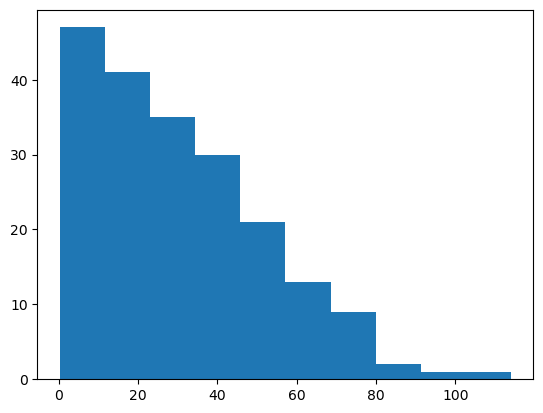

In [21]:
plt.hist(df["Newspaper"])


(array([30., 20., 21., 17., 18., 23., 14., 21., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <BarContainer object of 10 artists>)

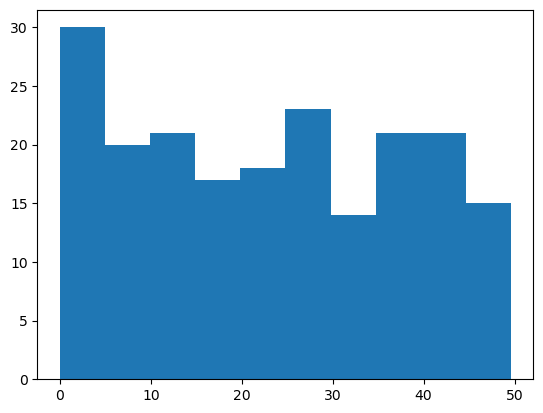

In [22]:
plt.hist(df["Radio"])

(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([  0.7 ,  30.27,  59.84,  89.41, 118.98, 148.55, 178.12, 207.69,
        237.26, 266.83, 296.4 ]),
 <BarContainer object of 10 artists>)

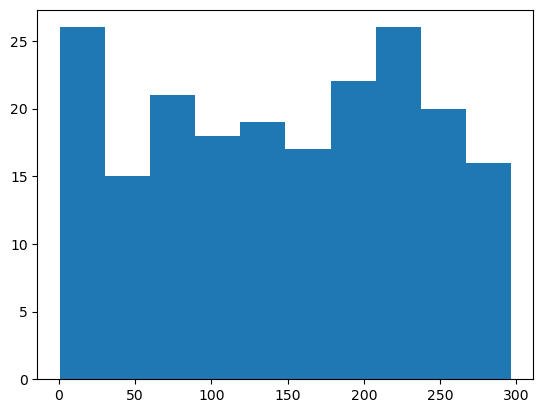

In [23]:
plt.hist(df["TV"])

(array([ 2.,  9., 17., 30., 29., 30., 34., 30., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <BarContainer object of 10 artists>)

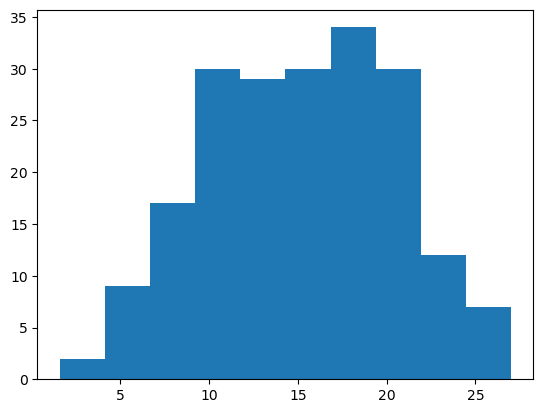

In [24]:
plt.hist(df["Sales"])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


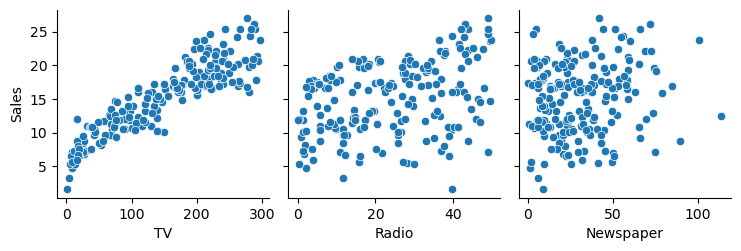

In [27]:
sns.pairplot(df,x_vars=['TV',"Radio","Newspaper"],y_vars="Sales",kind='scatter')

<Axes: ylabel='Frequency'>

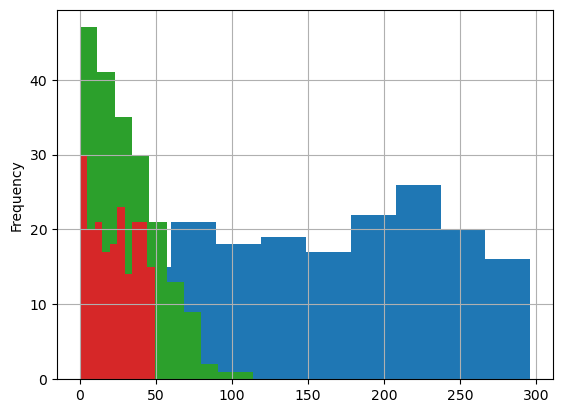

In [33]:
df["TV"].hist()
df["Sales"].hist()
df["Newspaper"].hist()
df["Radio"].hist()

<Axes: >

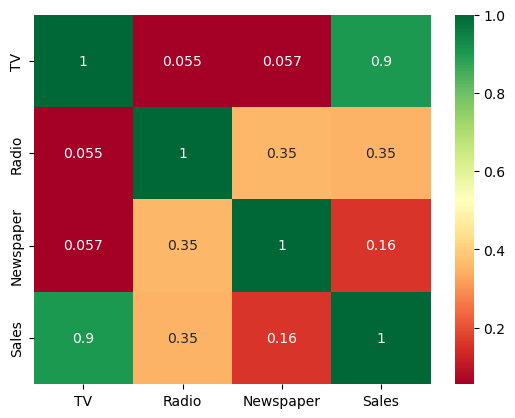

In [37]:
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [41]:
x=df.drop(columns="Sales")
y=df['Sales']

In [53]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
model= LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [61]:
model.intercept_


4.714126402214134

In [62]:
model.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [63]:
score=model.score(x_test,y_test)*100

In [64]:
score

90.59011844150827